#Report 2
By: Sean Rock

###Optimization Using Python Genetic Algorithm for Crashworthiness Design of Vehicles
The vehicle crashworthiness problem is a three-objective problem where the crash safety level of a vehicle is optimized. A higher safety level means how well a vehicle can protect the occupants from the effects of a frontal accident.

There are 5 decision variables (design parameters) that represent the thickness of reinforced members (thin-walled components of the automotive body Links to an external site.) around the car front.

Variable Constraints:

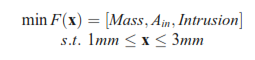

Where the three objective functions to evaluate are:

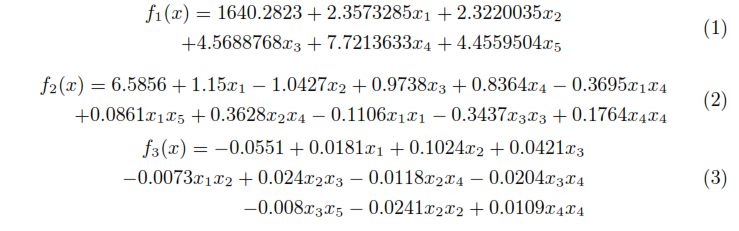

(1) For the consideration of lightweight, the mass of the vehicle is set as the first design objective.

(2) To take into account the worst scenario of acceleration-induced biomechanical damage of occupants, an integration of collision acceleration  in the full frontal crash is the second objective.

(3) To consider the most severe mechanical injury, the toe board intrusion in the offset-frontal crash is regarded as the third objective.

Installation command for genetic algoriithm library to do multi-objective optimization for problem (https://pypi.org/project/geneticalgorithm/).

In [1]:
pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=c2ab1c995423b5fd044d477e3428acef3c6135be00414e2ffd0afb54fb0bc808
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


Running the below variations of F(x) yielded illustrative results. I ran four variations of the function. I prioritized each variable individually in three of them. This revealed that F1 is at its minimum when all the variables are about 1. F2 is minimized when x2 and x3 are around 3 and the other variables are close to 1. F3 has its lowest results when all variables are about 3 except x3. These GA executions also revealed that F1 minimum value is significantly higher than F2 and F3.
As a result, the fourth variation that I ran (an evenly weighted function) attempts to minimize f1 as much as possible since it adds the most cost. It did this by selection solutions where the variables are all nearly equal to 1.

 The best solution found:
 [1.00015649 1.00059902 1.00086998 1.00036712 1.00026246]

 Objective function:
 551.375524333866


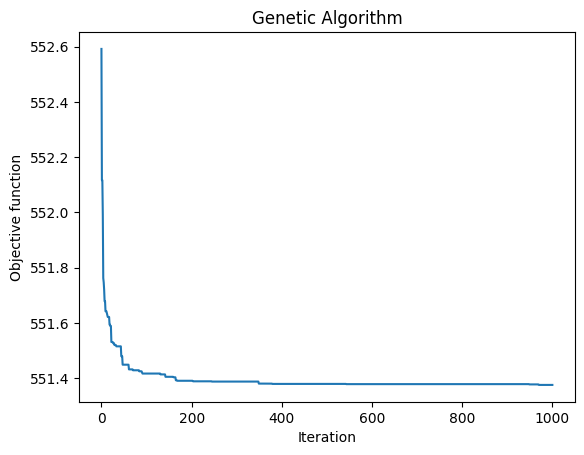

In [13]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def fEven(x):
    return (0.33*(1640.2823+2.3573285*x[0]+2.3220035*x[1]+4.5688768*x[2]+
               7.7213633*x[3]+4.4559504*x[4]))+ (0.33* (6.5856+1.15*x[0]-1.0427*x[1]+
               0.9738*x[2]+0.8364*x[3]+0.3695*x[0]*x[3]+0.0861*x[0]*x[4]+
               0.3628*x[1]*x[3]-0.1106*x[0]*x[0]-0.3437*x[2]*x[2]+
               0.1764*x[4]*x[4]))+  (0.34*(0.0181*x[0]+0.1024*x[1]+0.0421*x[2]+
               -0.0073*x[0]*x[1]+0.024*x[1]*x[2]-0.0118*x[1]*x[3]-0.0204*x[2]*x[3]+
               -0.008*x[2]*x[4]-0.0241*x[1]*x[1]+0.0109*x[3]*x[3]-0.0551))

algorithm_param = {'max_num_iteration':1000,\
                   'population_size':500,\
                   'mutation_probability':0.02,\
                   'elit_ratio': 0.05,\
                   'crossover_probability': 0.75,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound=np.array([[1.0,3.0]]*5)
model=ga(function=fEven,dimension=5,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)

model.run()

 The best solution found:
 [1.00006655 1.0000188  1.00065155 1.00000418 1.00049905]

 Objective function:
 1612.1436414798166


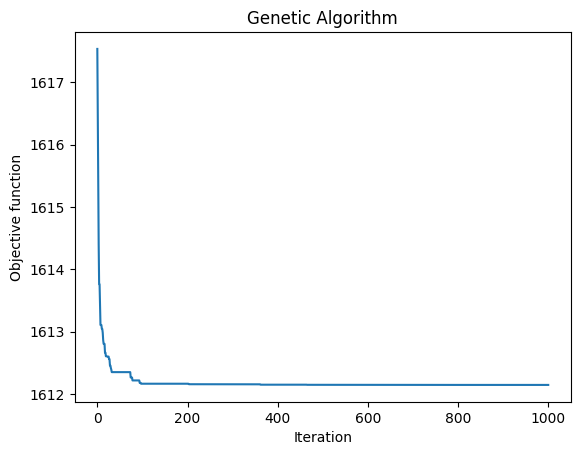

In [16]:

def f1Favored(x):
    return (0.97*(1640.2823+2.3573285*x[0]+2.3220035*x[1]+4.5688768*x[2]+
               7.7213633*x[3]+4.4559504*x[4]))+ (0.031* (6.5856+1.15*x[0]-1.0427*x[1]+
               0.9738*x[2]+0.8364*x[3]+0.3695*x[0]*x[3]+0.0861*x[0]*x[4]+
               0.3628*x[1]*x[3]-0.1106*x[0]*x[0]-0.3437*x[2]*x[2]+
               0.1764*x[4]*x[4]))+  (0.02*(0.0181*x[0]+0.1024*x[1]+0.0421*x[2]+
               -0.0073*x[0]*x[1]+0.024*x[1]*x[2]-0.0118*x[1]*x[3]-0.0204*x[2]*x[3]+
               -0.008*x[2]*x[4]-0.0241*x[1]*x[1]+0.0109*x[3]*x[3]-0.0551))
algorithm_param = {'max_num_iteration':1000,\
                   'population_size':500,\
                   'mutation_probability':0.02,\
                   'elit_ratio': 0.05,\
                   'crossover_probability': 0.75,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound=np.array([[1.0,3.0]]*5)
model=ga(function=f1Favored,dimension=5,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)


model.run()

 The best solution found:
 [1.00015616 2.9994816  2.99942126 1.00009085 1.00042056]

 Objective function:
 23.43705507347702


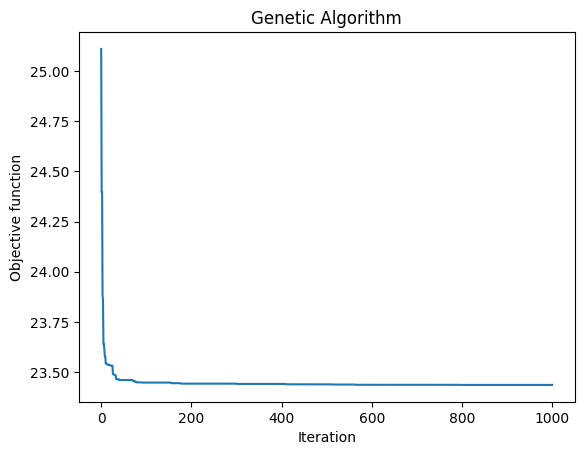

In [17]:

def f2Favored(x):
    return (0.01*(1640.2823+2.3573285*x[0]+2.3220035*x[1]+4.5688768*x[2]+
               7.7213633*x[3]+4.4559504*x[4]))+ (0.97* (6.5856+1.15*x[0]-1.0427*x[1]+
               0.9738*x[2]+0.8364*x[3]+0.3695*x[0]*x[3]+0.0861*x[0]*x[4]+
               0.3628*x[1]*x[3]-0.1106*x[0]*x[0]-0.3437*x[2]*x[2]+
               0.1764*x[4]*x[4]))+  (0.02*(0.0181*x[0]+0.1024*x[1]+0.0421*x[2]+
               -0.0073*x[0]*x[1]+0.024*x[1]*x[2]-0.0118*x[1]*x[3]-0.0204*x[2]*x[3]+
               -0.008*x[2]*x[4]-0.0241*x[1]*x[1]+0.0109*x[3]*x[3]-0.0551))

algorithm_param = {'max_num_iteration':1000,\
                   'population_size':500,\
                   'mutation_probability':0.02,\
                   'elit_ratio': 0.05,\
                   'crossover_probability': 0.75,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound=np.array([[1.0,3.0]]*5)

model=ga(function=f2Favored,dimension=5,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)


model.run()

 The best solution found:
 [2.99966806 2.9999446  1.00004011 2.31265847 2.99994817]

 Objective function:
 0.8961310982470931


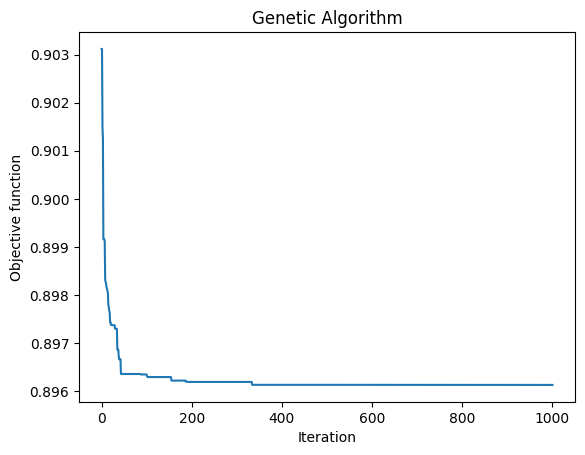

In [20]:
def f3Favored(x):
    return (0.0005*(1640.2823+2.3573285*x[0]+2.3220035*x[1]+4.5688768*x[2]+
               7.7213633*x[3]+4.4559504*x[4]))+ (0.0005* (6.5856+1.15*x[0]-1.0427*x[1]+
               0.9738*x[2]+0.8364*x[3]+0.3695*x[0]*x[3]+0.0861*x[0]*x[4]+
               0.3628*x[1]*x[3]-0.1106*x[0]*x[0]-0.3437*x[2]*x[2]+
               0.1764*x[4]*x[4]))+  (0.999*(0.0181*x[0]+0.1024*x[1]+0.0421*x[2]+
               -0.0073*x[0]*x[1]+0.024*x[1]*x[2]-0.0118*x[1]*x[3]-0.0204*x[2]*x[3]+
               -0.008*x[2]*x[4]-0.0241*x[1]*x[1]+0.0109*x[3]*x[3]-0.0551))
algorithm_param = {'max_num_iteration':1000,\
                   'population_size':500,\
                   'mutation_probability':0.02,\
                   'elit_ratio': 0.05,\
                   'crossover_probability': 0.75,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound=np.array([[1.0,3.0]]*5)
model=ga(function=f3Favored,dimension=5,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)


model.run()